<a href="https://colab.research.google.com/github/wnyngj/class2022spring/blob/main/nlp0504%2C0509.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tokenization

책의 text, string을 단어 단위로 끊어 분리하는 것

In [2]:
import nltk
#natural language tool kit 사람 언어 "text" <-> artificial laguage 컴퓨터 언어

In [13]:
#방법1. 깃헙사이트에 올라온 '죄와벌'파일을 콜랩 서버에 불러오기
# copy a file from github
import os
url = "https://raw.githubusercontent.com/hsnam95/class2022Spring/main/crime_punishment.txt"
os.system("curl " + url + " > crime_punishment.txt")

# read a text file in the server
file = open("crime_punishment.txt")
text = file.read().replace("\n", " ")
file.close()

In [4]:
#방법2. 그대로 복사 붙이기
# or copy/pase text here
text = 'Here’s to the crazy ones, the misfits, the rebels, the troublemakers, the round pegs in the square holes. \
The ones who see things differently — they’re not fond of rules. \
You can quote them, disagree with them, glorify or vilify them, \
but the only thing you can’t do is ignore them because they change things. \
They push the human race forward, and while some may see them as the crazy ones, we see genius, \
because the ones who are crazy enough to think that they can change the world, are the ones who do.'

In [ ]:
#ouput으로 파일에 저장하기
# write out a text file
file = open("tmp.txt", "w")
file.write(text)
file.close()

In [ ]:
#띄어쓰기 기준으로 "리스트"로 출력됨
#근데!! 이건 쉼표, 마침표가 포함되어있음
text.split()

In [ ]:
#아까 리스트로 출력된 것을 blank로 token 결합하여 string으로 출력
' '.join(text.split())

In [5]:
from nltk.tokenize import word_tokenize   
nltk.download('punkt') #문장부호까지 낱낱이 token 해주는 함수
words = word_tokenize(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from nltk.tokenize import RegexpTokenizer #정규표현 베이스 토크나이저
retokenize = RegexpTokenizer("[\w]+") #문장부호 삭제하여 token해주는 함수
words = retokenize.tokenize(text)

### Normalization  
**Stemming** 어간 추출. 대충의 패턴 규칙으로 어미를 잘라내는 것 (사전에 없는 어간 나올 수 있음)

**Lemmatization** 표제어(기본 사전형) 추출.


In [ ]:
#stemming 함수1

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
[stemmer.stem(w) for w in words]

#words엔 문장부호까지 삭제하여 token한 단어들의 목록 리스트
#대충 끊다보니 'chang'처럼 말이 안되는 단어들도 몇몇 있게됨

In [ ]:
#stemming 함수 2

from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
[stemmer.stem(w) for w in words]

In [ ]:
#lemmatization 함수
#더 정확함
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')    #존재하는 word를 기반으로 token 해주는 함수이므로 wordnet corpus사용
lemmatizer = WordNetLemmatizer()
[lemmatizer.lemmatize(w) for w in words]

### Stopword

불용어 (대명사, 조동사, 관사) = content가 없고 너무 자주 나오는 것들

In [6]:
#nltk제공

from nltk.corpus import stopwords  
nltk.download('stopwords')  #불용어 corpus 받아옴
print(words)
words = [w for w in words if not w in stopwords.words('english')]
#words의 각각의 단어가/ stopwords에 있지 않으면/ 취하라. 
print(words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['Here', '’', 's', 'to', 'the', 'crazy', 'ones', ',', 'the', 'misfits', ',', 'the', 'rebels', ',', 'the', 'troublemakers', ',', 'the', 'round', 'pegs', 'in', 'the', 'square', 'holes', '.', 'The', 'ones', 'who', 'see', 'things', 'differently', '—', 'they', '’', 're', 'not', 'fond', 'of', 'rules', '.', 'You', 'can', 'quote', 'them', ',', 'disagree', 'with', 'them', ',', 'glorify', 'or', 'vilify', 'them', ',', 'but', 'the', 'only', 'thing', 'you', 'can', '’', 't', 'do', 'is', 'ignore', 'them', 'because', 'they', 'change', 'things', '.', 'They', 'push', 'the', 'human', 'race', 'forward', ',', 'and', 'while', 'some', 'may', 'see', 'them', 'as', 'the', 'crazy', 'ones', ',', 'we', 'see', 'genius', ',', 'because', 'the', 'ones', 'who', 'are', 'crazy', 'enough', 'to', 'think', 'that', 'they', 'can', 'change', 'the', 'world', ',', 'are', 'the', 'ones', 'who', 'do', '.']
['Here', '’', 'c

### Collocation, Concordance

Collocation연어 = 숙어 ex. take care, Michael Smith
Concordance용례


In [7]:
nltk.download('gutenberg')    #gutenburg:저작권이 지난 텍스트 무료 corpus
text = nltk.corpus.gutenberg.raw('austen-emma.txt')
words = retokenize.tokenize(text)

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


NameError: ignored

In [ ]:
len(text)
type(text)  #str
text[0:100]

type(words) #list

In [8]:
#연어

nltk.Text(words).collocations()  # default: (num=20, window_size=2)
#총 20개의 collocation출력, 여기서 size는 3안되고 2만 되네

crazy ones


In [9]:
#용례

nltk.Text(words).concordance('Emma', 79, 10)
#앞서서 문장 부호 뺐으므로 문장 시작과 끝은 대문자로 파악해야겠지
#앞뒤 합쳐서 글자의 개수 79개
#영어공부할 때 좋겠지,

No matches


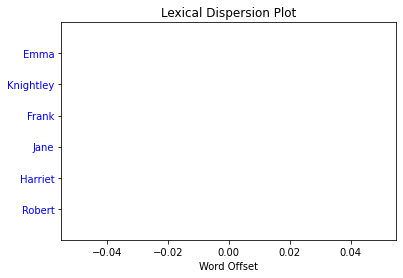

In [10]:
#분산
#ex. 16만개 글자위치에서 emma가 등장하는 곳을 plotting
nltk.Text(words).dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])

In [11]:
#양쪽 옆으로 emma와 비슷하게 나오는 것 출력하라

# Distributional similarity: 
# find other words which appear in the same contexts as the specified word; 
# list most similar words first.
nltk.Text(words).similar("Emma")

No matches


In [12]:
# Find contexts where the specified words appear; list most frequent common contexts first.
nltk.Text(words).common_contexts(["Emma", "she"])

#ex. but-was context에 Emma와 she가 같이 나타나는 경향이 있다.

('The following word(s) were not found:', 'emma she')


### Frequency distribution, Frequency plot

한 corpus의 특징을 보여주므로 가장 중요한 것

In [ ]:
fd = nltk.FreqDist(words).most_common(20)
fd
#상위에 있는 것들 대부분 stopwords 불용어

In [ ]:
nltk.Text(words).plot(20)

### Dictionary

사전

In [ ]:
nltk.download('words')
nltk.corpus.words.words('en')[-20:-1]

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


['zymosis',
 'zymosterol',
 'zymosthenic',
 'zymotechnic',
 'zymotechnical',
 'zymotechnics',
 'zymotechny',
 'zymotic',
 'zymotically',
 'zymotize',
 'zymotoxic',
 'zymurgy',
 'Zyrenian',
 'Zyrian',
 'Zyryan',
 'zythem',
 'Zythia',
 'zythum',
 'Zyzomys']

In [ ]:
len(nltk.corpus.words.words('en'))

### Extract information (pos tag, named entity)
품사/약어/예시

#### **POS tag list**:
Part Of Speech - 품사

CC	coordinating conjunction \
CD	cardinal digit \
DT	determiner \
EX	existential there (like: "there is" ... think of it like "there exists") \
FW	foreign word \
IN	preposition/subordinating conjunction \
JJ	adjective	'big' \
JJR	adjective, comparative	'bigger' \
JJS	adjective, superlative	'biggest' \
LS	list marker	1) \
MD	modal	could, will \
NN	noun, singular 'desk' \
NNS	noun plural	'desks' \
NNP	proper noun, singular	'Harrison' \
NNPS	proper noun, plural	'Americans' \
PDT	predeterminer	'all the kids' \
POS	possessive ending	parent's \
PRP	personal pronoun	I, he, she \
PRP\$	possessive pronoun	my, his, hers \
RB	adverb	very, silently, \
RBR	adverb, comparative	better \
RBS	adverb, superlative	best \
RP	particle	give up \
TO	to	go 'to' the store. \
UH	interjection	errrrrrrrm \
VB	verb, base form	take \
VBD	verb, past tense	took \
VBG	verb, gerund/present participle	taking \
VBN	verb, past participle	taken \
VBP	verb, sing. present, non-3d	take \
VBZ	verb, 3rd person sing. present	takes \
WDT	wh-determiner	which \
WP	wh-pronoun	who, what \
WP\$	possessive wh-pronoun	whose \
WRB	wh-abverb	where, when \

In [ ]:
#tokenize 먼저
sent = "I am Jhon from America and would like to go to Starbuck"
words = nltk.word_tokenize(sent)

In [ ]:
nltk.download('averaged_perceptron_tagger')
pos = nltk.pos_tag(words)

In [ ]:
nltk.download('maxent_ne_chunker')
NE = nltk.ne_chunk(pos)
# common Entity types: ORGANIZATION, PERSON, LOCATION, DATE, TIME, MONEY, and GPE (geo-political entity)

### Wordcloud

frequency 기반으로 / 폰트 size차이로 / visualize해줌

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = nltk.corpus.gutenberg.raw('bible-kjv.txt')

wc = WordCloud().generate(text) 
plt.imshow(wc)
#성경에서 많이 나오는 단어들의 글자 크기를 크게 나타냄

In [ ]:
stopwords = set(STOPWORDS) 
stopwords.add('unto') #nltk에선 stopwords가 정해져있지만 추가할 수도 있음
wc = WordCloud(stopwords = stopwords).generate(text) #기존 stopwords에 unto를 추가한 stopwords를 재정의하기
plt.imshow(wc)

### Regular expression

규칙 표현하기

ex. 텍스트 seach하고싶을 때  

In [ ]:
import re

In [ ]:
re.search('a', 'abcdefa')

In [ ]:
re.findall('a', 'abcdefa')

In [ ]:
re.sub('a', 'b', 'abcdefa')

In [ ]:
'''       Basic Regular Expression Meta-Characters, Including Wildcards, Ranges and Closures

.	        Wildcard, matches any character
^abc	    Matches some pattern abc at the start of a string
abc$	    Matches some pattern abc at the end of a string
[abc]	    Matches one of a set of characters
[^abc]    Matches anything but a set of characters
[A-Z0-9]	Matches one of a range of characters
ed|ing|s	Matches one of the specified strings (disjunction)
*	        Zero or more of previous item, e.g. a*, [a-z]* (also known as Kleene Closure)
+	        One or more of previous item, e.g. a+, [a-z]+
?	        Zero or one of the previous item (i.e. optional), e.g. a?, [a-z]?
{n}	      Exactly n repeats where n is a non-negative integer
{n,}	    At least n repeats
{,n}	    No more than n repeats
{m,n}	    At least m and no more than n repeats
a(b|c)+	  Parentheses that indicate the scope of the operators
(...)     Matches whatever regular expression is inside the parentheses
\d
Matches any decimal digit; this is equivalent to the class [0-9].
\D
Matches any non-digit character; this is equivalent to the class [^0-9].
\s
Matches any whitespace character; this is equivalent to the class [ \t\n\r\f\v].
\S
Matches any non-whitespace character; this is equivalent to the class [^ \t\n\r\f\v].
\w
Matches any alphanumeric character; this is equivalent to the class [a-zA-Z0-9_].
\W
Matches any non-alphanumeric character; this is equivalent to the class [^a-zA-Z0-9_].

'''

In [ ]:
engdict = nltk.corpus.words.words('en')

result = [w for w in engdict if re.search('ed$', w)]
# result = [w for w in engdict if re.search('^..j..t..$', w)]
# result = [w for w in engdict if re.search('^[ghi][mno][jlk][def]$', w)]
# result = [w for w in engdict if re.search('^[ah]+$', w)][:10]
print(result[:10])

In [ ]:
nltk.download('treebank')
wsj = nltk.corpus.treebank.words()

result = [w for w in wsj if re.search('(ed|ing)$', w)]
# result = [w for w in wsj if re.search('^[0-9]+\.[0-9]+$', w)]
# result = [w for w in wsj if re.search('^[A-Z]+\$$', w)]
# result = [w for w in wsj if re.search('^[0-9]{4}$', w)]
# result = [w for w in wsj if re.search('^[0-9]+-[a-z]{3,5}$', w)]
# result = [w for w in wsj if re.search('^[a-z]{5,}-[a-z]{2,3}-[a-z]{,6}$', w)]

result = sorted(set(result))
print(result[:10])

In [ ]:
import os
url = "https://raw.githubusercontent.com/hsnam95/my/main/friends_season01_script.txt"
os.system("curl " + url + " > friends_season01_script.txt")

# read a text file in the server
file = open("friends_season01_script.txt")
text = file.read()
file.close()
text

In [ ]:
pattern = '(?<=: ).+(?=[\.|\?|\!])'
sent = re.findall(pattern, text)
sent
text = '\n'.join(sent)

In [ ]:
# write out a text file
file = open("tmp.txt", "w")
file.write(text)
file.close()